# <font color=Green> Lecture 6: Data preprocessing-Round 2 </font>
#### Operating on Null values, Normalization,  and Descriptive Statistics
### Learning Objectives:
#### Students will be able to :
 * Use' pandas dataframe remove rows/columns based on number of missing values
    * know how to use  `.dropna()` with `how` or `thresh` parameters,
 * Replace `Null` values with substitue value using
     * Constant value
     * average of row or column values
     * a value from other column or other row
 * Extract descriptive statistics from the data
 * Normalize the data values
     * to the range [0-1]
     * using standard score (to have a 0 mean) 
 * plot and read the correleation matrix of the data
 * plot and read the scatter matrix of the data

-------------
-------------

**First we need to import the Pandas package**

In [2]:
import pandas as pd
import numpy as np

<font color=blue> 1- Reading and cleaning our dataset from a csv file </font>

    a) read the dataset and fix the columns format
    b) replace missing values with `np.nan`
    c)invistigate missing values (counts and locations)

In [3]:
!dir
# for linux/mac use ls
#!ls  

 Volume in drive C has no label.
 Volume Serial Number is B2B3-5C73

 Directory of C:\Users\ilazrig\ibLazrig-GDrive\Spring2021\CIDM4372\Lectures\W06

02/11/2021  12:08 PM    <DIR>          .
02/11/2021  12:08 PM    <DIR>          ..
01/11/2021  10:17 AM    <DIR>          .ipynb_checkpoints
02/17/2020  11:28 AM         7,115,075 AB_NYC_2019.csv
02/17/2020  06:11 PM             7,999 CorrelMx-img.png
01/11/2021  10:17 AM    <DIR>          new-york-city-airbnb-open-data
02/16/2020  10:38 PM         2,562,692 new-york-city-airbnb-open-data.zip
02/05/2021  05:38 PM           192,340 New_York_City_.jpg
02/18/2020  01:27 PM           382,926 ScaterMx-3cols.png
02/17/2020  06:14 PM         1,053,667 ScaterMx-cln.png
02/17/2020  06:22 PM           382,926 ScaterMx-ndf.png
02/10/2020  05:30 PM             1,011 Untitled.ipynb
02/11/2021  12:08 PM         7,019,284 W06-Working with Null Values-and DescStats.ipynb
               9 File(s)     18,717,920 bytes
               4 Dir(s)  36,170,809,34

In [1]:
!type AB_NYC_2019.csv
#for mac/linux use cat
#!cat AB_NYC_2019.csv

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,na,na,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,6/2

867769,Full Bedroom in Bed-Stuy,4509849,Ines,Brooklyn,Bedford-Stuyvesant,40.68411,-73.92973,Private room,65,3,116,5/21/2019,1.47,3,73
868548,Friendly & fun w/ private terrace,4372160,Seth,Brooklyn,Williamsburg,40.70933,-73.94141,Private room,58,10,7,5/2/2018,0.1,1,0
869522,Private room/Upper Manhattan,4581489,Nick,Manhattan,Harlem,40.82579,-73.94907,Private room,65,2,2,12/8/2015,0.05,1,0
870119,Beautiful 2bdrm Bklyn duplex w/deck + backyard,355548,Jessica,Brooklyn,Clinton Hill,40.69208,-73.96525,Entire home/apt,185,4,8,8/27/2018,0.22,1,8
871076,"LARGE 2 BR w/Dining Room, Balcony, Echo",4590460,Clare,Brooklyn,Bensonhurst,40.6101,-73.99591,Entire home/apt,115,4,6,12/6/2017,0.08,1,0
872035,furnished bedroom 1150$ a month  ,4599027,Amal,Manhattan,East Harlem,40.8032,-73.94004,Private room,100,30,0,na,na,2,365
872210,Quiet 1BR Heart of the East Village,4600589,Carter,Manhattan,East Village,40.732,-73.98759,Private room,200,1,0,na,na,1,0
873465,Cute & Comfortable One Bedroom,3588693,Maria,Br

2478825,2 BR Designer's Apt in Heart of NYC,2935265,Andrew,Manhattan,SoHo,40.72337,-74.00175,Entire home/apt,400,1,18,1/2/2019,0.28,2,30
2479193,Chic New York city apartment,7974574,Vanita,Manhattan,Kips Bay,40.744,-73.98054,Entire home/apt,152,270,5,1/6/2016,0.1,1,0
2485482,Boutique Apt. NYC  by  24 HR Metro,12718658,Ray,Queens,Jackson Heights,40.75484,-73.8764,Shared room,75,2,0,na,na,1,0
2487073,18th Floor Bright Bedroom with Private Bathroom,6194434,Chiara,Manhattan,Financial District,40.70933,-74.00381,Private room,169,8,15,6/10/2019,0.24,1,60
2487848,Quintessential W'burg Apartment,12358955,Priya,Brooklyn,Williamsburg,40.71116,-73.96078,Private room,95,2,156,6/10/2019,2.43,2,274
2487851,Quintessential W'burg Private Room,12358955,Priya,Brooklyn,Williamsburg,40.71072,-73.96143,Private room,90,2,142,6/16/2019,2.22,2,306
2488022,Sunny Quiet Room In Harlem,12732806,Jerome,Manhattan,Harlem,40.8151,-73.95147,Private room,60,1,19,10/22/2018,1.34,1,356
2488227,COZY 1 BR IN COOL LOWER EAS

4366115,Bright duplex apartment,14400653,Belinda,Brooklyn,Greenpoint,40.72668,-73.94728,Entire home/apt,110,2,4,1/4/2017,0.12,1,0
4369737,"Bright 1 Bedroom, Perfect Location!",15154,Gloria,Manhattan,Upper West Side,40.78,-73.97793,Entire home/apt,160,3,5,3/29/2016,0.09,1,0
4370230,na,22686810,MichaÃ«l,Manhattan,Nolita,40.72046,-73.9955,Entire home/apt,215,7,5,1/2/2016,0.09,1,0
4375146,Beautiful & spacious apartment,22715031,Fernando,Queens,Astoria,40.76575,-73.92092,Private room,75,5,1,11/10/2014,0.02,1,0
4375375,"Artsy 2 Bedroom Apt. in Harlem, NY",22716230,M. Johanne,Manhattan,East Harlem,40.80006,-73.9459,Entire home/apt,200,5,0,na,na,1,0
4377337,Beautiful Railroad Style Apartment!,18893494,Leonella,Manhattan,East Harlem,40.79872,-73.9411,Entire home/apt,120,3,6,6/18/2019,0.96,1,279
4377929,Spacious 1Br in East Village,7245580,David,Manhattan,East Village,40.72627,-73.98303,Entire home/apt,198,4,180,6/18/2019,3.22,1,269
4378816,"Room in Bushwick Brooklyn NYC, LG KITCHEN & YARD",2190

6117496,The Manhattan Club studio New York,30787515,Brooke,Manhattan,Midtown,40.76365,-73.98057,Entire home/apt,299,2,8,12/14/2015,0.16,1,176
6121052,Chic calm in the heart of Soho,13525339,Robert,Manhattan,SoHo,40.72337,-73.99724,Entire home/apt,195,2,60,6/24/2019,1.18,1,16
6121300,Charming Bedroom in Greenwich,7655328,Jessica,Manhattan,Greenwich Village,40.72923,-73.99949,Private room,78,1,3,1/31/2016,0.06,3,0
6124097,Amazing 2 Bedroom Chelsea,3035426,Dimitri,Manhattan,Chelsea,40.74089,-74.00181,Entire home/apt,250,2,28,5/26/2019,0.56,1,328
6128992,"LOCATION, LOCATION, LOCATION -NYC!!",301346,Dawn,Manhattan,Chelsea,40.75054,-73.99683,Entire home/apt,150,14,1,5/20/2015,0.02,1,0
6129158,Large modern 1BR w/ Balcony!,31796292,Mary,Manhattan,Upper East Side,40.777,-73.95253,Entire home/apt,350,1,0,na,na,1,0
6130145,Moma Casanova. New Additions!,29871437,Ester,Queens,Sunnyside,40.74315,-73.91733,Private room,78,3,113,7/1/2019,2.23,1,285
6131266,BIG SUNNY ROOM IN CROWN HEIGHTS,3940516,Ali,B

7664594,1 Bedroom Park Slope 1 Block Subway,40234779,Tristan,Brooklyn,Sunset Park,40.66016,-73.99813,Private room,60,1,0,na,na,1,0
7664692,SemiPrivateLivingRoomTwinBed/MaimonidesLutheranHos,40124500,Regina,Brooklyn,Borough Park,40.63574,-74.00329,Shared room,33,1,73,7/1/2019,1.53,2,365
7664789,Cozy room in the heart of Astoria/10 min Manhattan,433207,Maryann,Queens,Astoria,40.76205,-73.91379,Private room,45,1,190,7/7/2019,5.2,2,132
7664863,A Cozy Room In A Brooklyn House,40236384,Oates,Brooklyn,Prospect-Lefferts Gardens,40.65933,-73.95931,Private room,65,1,35,4/30/2017,0.73,2,0
7664959,Nice and cozy room!,40237377,Lena,Brooklyn,Sheepshead Bay,40.5994,-73.95941,Private room,119,1,0,na,na,1,126
7665230,Sunny Master Bedroom in Sunset Park,15892935,Theresa,Brooklyn,Sunset Park,40.64153,-74.01562,Private room,50,1,2,8/22/2015,0.04,1,0
7665764,US Open? Perfect Lg 1 BR apartment,40244009,Marvin,Queens,Sunnyside,40.73926,-73.92045,Entire home/apt,150,3,2,9/13/2015,0.04,1,0
7666157,Noel Palace,

9393127,LUXURY SUNLIT place in the EAST VILLAGE!,47730499,Katherine,Manhattan,East Village,40.72161,-73.98013,Entire home/apt,200,1,52,6/30/2019,1.2,1,74
9393134,Spacious 3br Williamsburg Apt One Block From Water,32812120,Bjorn,Brooklyn,Williamsburg,40.7196,-73.95956,Entire home/apt,260,3,4,5/29/2017,0.11,2,0
9393314,Bright Room near Times Sq/Central Pk.,14847501,Zachary,Manhattan,Hell's Kitchen,40.76747,-73.99422,Private room,105,5,0,na,na,2,0
9393332,Little house on 12th Street,46467513,Patricia,Brooklyn,Gowanus,40.67017,-73.99029,Private room,85,1,0,na,na,1,0
9393343,Spacious 1 bedroom near 125th St.,35899921,Alexandra,Manhattan,Harlem,40.81176,-73.94999,Entire home/apt,100,3,2,2/22/2016,0.05,1,0
9393610,Big room in Williamsburg Penthouse,48723117,Gaute,Brooklyn,Williamsburg,40.7116,-73.9521,Private room,79,4,0,na,na,1,0
9393674,Staying with Mike in Hells Kitchen/Times Square.,1557889,Michael,Manhattan,Hell's Kitchen,40.75925,-73.99136,Private room,120,5,125,9/29/2018,2.83,2,177
939

10589384,Beautiful Views & Apt in Brooklyn!,1558246,Modupe,Brooklyn,Fort Greene,40.68811,-73.97621,Private room,105,3,0,na,na,1,0
10591658,Beautiful Studio in Soho - Greenwich Village,14077910,Sabrina And Antoine,Manhattan,Greenwich Village,40.72843,-73.9999,Entire home/apt,175,60,28,3/29/2019,0.7,1,126
10592839,Light-filled Bushwick apartment,4745560,Michelle,Brooklyn,Bushwick,40.70158,-73.91851,Entire home/apt,130,1,0,na,na,1,0
10593675,"La Spezia room.  Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,9/29/2018,0.43,6,180
10595000,Spacious Room in Park Slope,16919131,Joseph,Brooklyn,Park Slope,40.6668,-73.97713,Private room,90,2,56,5/29/2019,1.34,1,60
10595374,Elegant Chic Brooklyn Duplex House. Private Deck,13731605,Antonella,Brooklyn,Crown Heights,40.6764,-73.93819,Entire home/apt,283,4,92,7/3/2019,2.34,2,234
10596856,Luxurious 1 King bedroom in NYC.,54675040,Christopher,Queens,Woodside,40.74706,-73.90434,Private room,50,1,0,n

12902256,Cozy private bedroom with window,37782666,Kevin,Manhattan,Lower East Side,40.71366,-73.98799,Private room,72,4,59,6/9/2019,1.56,1,83
12902467,Cozy and relaxing East Village home,1411232,Thomas,Manhattan,East Village,40.7266,-73.97872,Entire home/apt,150,1,3,5/19/2016,0.08,1,0
12902686,BayRidge Brooklyn Apartment,70686576,Fotini,Brooklyn,Fort Hamilton,40.61707,-74.03473,Entire home/apt,110,1,1,6/23/2016,0.03,1,0
12903772,"Luxury Studio + Gym, Rooftop, Elevator!",70646170,Andrew,Manhattan,Upper West Side,40.79167,-73.97273,Entire home/apt,200,2,6,7/30/2016,0.16,1,0
12904061,Superior double Bedroom - Cozy & Comfy B6,20559017,Yohan,Manhattan,East Harlem,40.7862,-73.94413,Private room,50,30,1,9/8/2017,0.04,9,333
12904840,Spacious and sunny room in Brooklyn,27634654,Elena,Brooklyn,Bay Ridge,40.6311,-74.03022,Private room,35,30,5,1/3/2018,0.13,2,0
12905314,Medium sunny furnished room,16414492,Julia Marie,Manhattan,Washington Heights,40.83873,-73.94118,Private room,45,1,6,7/18/2017,0.

14066228,Spacious in 1BR East Harlem NYC,46460278,Amanda,Manhattan,East Harlem,40.79474,-73.9383,Entire home/apt,110,3,26,6/23/2019,0.73,1,5
14066397,"Sunny, Clean, 1BR in Washington Heights",33990883,Summer,Manhattan,Washington Heights,40.85182,-73.92941,Entire home/apt,115,5,13,5/22/2019,0.37,1,0
14066702,Room in Uptown Manhattan,84463909,Sandra,Manhattan,Washington Heights,40.8385,-73.94313,Private room,70,3,15,5/2/2017,0.43,1,95
14068074,Soho Split-level Penthouse,13410839,Todd,Manhattan,Nolita,40.72339,-73.99461,Private room,250,91,55,5/8/2019,1.59,1,34
14068646,Prime Location! 3 Rooms! newly furnished Apt!,2119276,Host,Manhattan,East Village,40.72752,-73.98969,Entire home/apt,200,30,6,10/11/2018,0.28,39,96
14068668,OVERSIZED STUDIO IN EAST 37 TH~MURRAY HILL,2856748,Ruchi,Manhattan,Murray Hill,40.74733,-73.97865,Entire home/apt,197,30,0,na,na,49,329
14069371,Big bedroom 3 stops/10 mins from Manhattan!,5581683,Brett,Brooklyn,Cobble Hill,40.68759,-73.99376,Private room,82,1,25,8/31/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



29560068,Midtwon / UES Gem With Private Terrace!,165776960,Raanan,Manhattan,Midtown,40.75935,-73.96422,Entire home/apt,135,30,0,na,na,2,341
29560863,Warm & Cozy Bushwick apt steps from Dekalb L Train,24050629,Mackenzey And Kelly,Brooklyn,Bushwick,40.70125,-73.91982,Entire home/apt,350,2,1,12/31/2018,0.16,1,0
29561222,Quite and Comfortable,222559543,Carmen,Brooklyn,East New York,40.6626,-73.87731,Private room,29,1,59,7/5/2019,7.25,2,54
29562532,1/2 of a LARGE APARTMENT in Bushwick / Bedstuy <3,1903737,Natalie,Brooklyn,Bedford-Stuyvesant,40.69414,-73.93231,Private room,99,2,0,na,na,3,0
29562750,Huge sunny loft on Downtown Bowery!,23983203,Vance,Manhattan,Chinatown,40.71491,-73.99878,Entire home/apt,200,2,1,10/31/2018,0.12,1,5
29562919,Awesome space on your own floor with a PrivateBath,19011946,John,Brooklyn,Bay Ridge,40.63766,-74.02626,Private room,99,3,1,10/25/2018,0.12,2,362
29563829,Beautiful Twin Room in Victorian Cottage,7878911,Summer & Kamilya,Brooklyn,Flatbush,40.63635,-73.95502,

30694839,Brand new beautiful apartment in Williamsburg!,17665952,Bree,Brooklyn,Williamsburg,40.70973,-73.95811,Private room,75,7,2,5/19/2019,0.28,1,0
30694973,Door man condo near 61st St station,137358866,Kazuya,Queens,Woodside,40.74188,-73.90146,Private room,61,30,2,5/31/2019,0.75,103,230
30695144,Williamsburg Studio,56286886,Juan Carlos,Brooklyn,Williamsburg,40.71673,-73.96428,Entire home/apt,150,2,4,5/26/2019,0.59,1,12
30695780,Heart of Upper East Side Home w/ washer-dryer,2939479,Danielle,Manhattan,Upper East Side,40.7751,-73.95294,Private room,125,3,2,7/1/2019,0.32,1,23
30696051,Modern Spacious Studio just 1 min To Bus Stop,120912613,Sanny,Queens,Glendale,40.6998,-73.89351,Entire home/apt,99,2,28,7/6/2019,5.12,1,289
30696675,"High wifi , private space and private room",229769527,Morrece,Brooklyn,East Flatbush,40.65679,-73.91631,Private room,200,5,0,na,na,1,365
30697032,A Quiet Room in Greenpoint,72512761,Erik,Brooklyn,Greenpoint,40.72402,-73.94949,Private room,75,3,2,7/2/2019,2,3,

32185689,Sunny private room in the heart of trendy Bushwick,33992697,Dor,Brooklyn,Bushwick,40.70458,-73.92888,Private room,80,2,3,6/20/2019,0.63,1,14
32185917,*NEW* Clinton Hill Room in Plant Filled Apartment,545623,Misty,Brooklyn,Clinton Hill,40.68447,-73.96714,Private room,75,1,11,5/13/2019,2.64,1,5
32185974,Spacious One Bedroom in Hell's Kitchen,241361740,Michael,Manhattan,Hell's Kitchen,40.75951,-73.99455,Entire home/apt,230,2,0,na,na,1,0
32186503,Spacious two bedroom in Hell's Kitchen,241366983,Jack,Manhattan,Hell's Kitchen,40.7647,-73.99516,Entire home/apt,250,2,0,na,na,1,0
32186906,"Ottoman 3BR, 2Bath In Safest NYC w/ Balcony",61316506,Mamun,Queens,Sunnyside,40.74603,-73.91458,Entire home/apt,145,1,14,6/24/2019,2.9,2,331
32186945,Private Master Bedroom with Ensuite Bath HK,25043035,Lauren,Manhattan,Midtown,40.76638,-73.98311,Private room,100,1,4,5/12/2019,0.85,1,0
32187475,"Prime loc. Spacious, bright, clean, cozy room",7627510,Eduardo,Queens,Jackson Heights,40.75318,-73.88404,P

33580907,Art Deco Charm in the heart of The Village!,248122395,Walker Hotel Greenwich Village,Manhattan,Greenwich Village,40.73679,-73.99592,Private room,425,1,4,6/23/2019,1.52,2,359
33581628,"Spacious, Clean and Modern 2 Bedroom Suite",148317706,Michaelle,Brooklyn,Prospect-Lefferts Gardens,40.66002,-73.94363,Entire home/apt,150,2,8,7/5/2019,7.27,1,30
33582424,"clean  room  with private bath, 10 Mins to city",253047601,Wendy,Brooklyn,Bushwick,40.70092,-73.93732,Private room,50,1,26,7/4/2019,9.07,1,9
33582776,Cozy Guest Quarters in East Village Penthouse!,4765305,Haffro,Manhattan,East Village,40.7234,-73.98267,Private room,62,2,15,6/21/2019,4.84,4,284
33583238,Lovely apartment 2 bedrooms 2 bathrooms in UWS,30137775,Thibault,Manhattan,Upper West Side,40.79321,-73.96823,Private room,380,3,1,4/21/2019,0.38,1,24
33584724,Comfyâ€™s Bedroom Close Subway,120763629,Mei,Brooklyn,Bath Beach,40.60615,-74.00315,Private room,49,2,3,4/26/2019,1.05,2,347
33585504,New 2 Bed 1 Bath in the UES #6131,1138

34670423,Newly Renovated Modern Home,259426283,Keymi,Manhattan,Inwood,40.86284,-73.92704,Private room,60,1,2,5/28/2019,1.18,1,326
34670547,J- COZY ROOM FOR 1 FEMALE FREE WIFI & COFFEE,213208277,Darry,Queens,South Ozone Park,40.67332,-73.79682,Shared room,30,5,1,6/9/2019,1,8,365
34670672,Beach Front Escape - Rockaway Surf Beach!,8893700,John,Queens,Arverne,40.58817,-73.79513,Entire home/apt,275,2,0,na,na,2,69
34671704,"Modern and fun 2 bdrm in Williamsburg, Brooklyn",95015886,Gali,Brooklyn,Williamsburg,40.71373,-73.96743,Entire home/apt,275,2,0,na,na,1,16
34672846,Lux Apt in Heart of Downtown *GREAT LOCATION,252836607,Alexis,Manhattan,Financial District,40.70757,-74.00788,Entire home/apt,255,2,2,6/22/2019,1.36,1,12
34673353,30day min High flr apt in the center of Manhattan,261560877,Edit,Manhattan,Theater District,40.76103,-73.97996,Entire home/apt,250,25,0,na,na,1,261
34673695,Home SWEET Home for a day or 2,261563626,Jacqueline,Queens,St. Albans,40.68993,-73.75695,Private room,50,1,23,

35679309,A unique cozy 2 bedroom apartment,268396733,Hirsh,Brooklyn,Kensington,40.64353,-73.9845,Entire home/apt,100,1,1,6/28/2019,1,1,96
35679614,Private BR in Eco-Friendly East Village Apt,1764739,Bobby,Manhattan,East Village,40.72352,-73.97493,Private room,85,1,0,na,na,1,23
35679813,Studio Style Basement in Shared Apartment,63356650,Rochelle,Brooklyn,Crown Heights,40.6771,-73.96007,Private room,60,20,0,na,na,1,38
35679935,Casa de Marko,33555400,Marko,Queens,Briarwood,40.71288,-73.81368,Entire home/apt,300,2,0,na,na,1,12
35680065,Room 1: Spacious Queen w/ Closet & Light breakfast,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.69134,-73.93288,Private room,75,1,2,7/6/2019,2,3,139
35680174,Gorgeous 2 Bedroom apartment in Bushwick...,268405137,Maria,Brooklyn,Bushwick,40.69284,-73.91248,Entire home/apt,140,2,4,7/3/2019,4,1,359
35680258,spacious sun-lit brooklyn apt by water,7073540,Nico,Brooklyn,Red Hook,40.68002,-74.0055,Entire home/apt,130,2,0,na,na,1,79
35680818,Best Block in Soho Pea

The file is comma (,) separated with header

In [8]:
#try reading without any extra parameters
notclean = pd.read_csv("AB_NYC_2019.csv")

In [4]:
#or use
notclean = pd.read_csv("AB_NYC_2019.csv", sep=',')

In [9]:
#verify the shape
notclean.shape

(48895, 16)

In [6]:
#see column labels
notclean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
#Check some rows
notclean[:5]

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0          na   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

  reviews_per_month  calculated_host_listings_count  availability_365  
0              0.21                               6               365  
1              0.38                               2               355  
2                na                               1               365  
3              4.64                               1               194  
4               0.1                               1                 0

I saw some rows has `na` as missing value, so I need to replace missing values with `np.nan`

In [11]:
#use na_values ='na' to instruct read_csv to replace `na` by `np.nan`
notclean = pd.read_csv("AB_NYC_2019.csv",na_values='na')

In [12]:
#check rows aagin to see if na's replaced by nans
notclean[:5]

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Now Let's look at the missing values and do some counting

#### Use .isnull() to find Nan values in the data

In [13]:
#not very useful by it self, but is a partial step toward the next tasks
notclean[:].isnull()  

id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
5      False  False    False      False                False          False   
6      False  False    False      False                False          False   
7      False  False    False      False                False          False   
8      False  False    False      False                False          False   
9      False  False    False      False                False          False   
10     False  False    False      False                False          False   
11     False  False    False      False                False          False   
12     False  False    False      False                False          False   
13     False  False    False      False                False          False   
14     False  False    False      False                False          False   
15     False  False    False      False                False          False   
16     False  False    False      False                False          False   
17     False  False    False      False                False          False   
18     False  False    False      False                False          False   
19     False  False    False      False                False          False   
20     False  False    False      False                False          False   
21     False  False    False      False                False          False   
22     False  False    False      False                False          False   
23     False  False    False      False                False          False   
24     False  False    False      False                False          False   
25     False  False    False      False                False          False   
26     False  False    False      False                False          False   
27     False  False    False      False                False          False   
28     False  False    False      False                False          False   
29     False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48865  False  False    False      False                False          False   
48866  False  False    False      False                False          False   
48867  False  False    False      False                False          False   
48868  False  False    False      False                False          False   
48869  False  False    False      False                False          False   
48870  False  False    False      False                False          False   
48871  False  False    False      False                False          False   
48872  False  False    False      False                False          False   
48873  False  False    False      False                False          False   
48874  False  False    False      False                False          False   
48875  False  False    False      False                False          False   
48876  False  False    False      False                False          False   
48877  False  False    False      False                False          False   
48878  False  False    False      False                False          False   
48879  False  False    False      False                False          False   
48880  False  False    False      False                False          False   
48881  False  False    False      False                False          False   
48882  False  False    False      False                False          False   
48883  False  False    False      False                False

#### To see which columns has null

In [14]:
notclean[:].isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

#### To see which rows has null  using the parameter ``axis=1``

In [15]:
notclean[:].isnull().any(axis=1)

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
48865     True
48866     True
48867     True
48868     True
48869     True
48870     True
48871     True
48872     True
48873     True
48874     True
48875     True
48876     True
48877     True
48878     True
48879     True
48880     True
48881     True
48882     True
48883     True
48884     True
48885     True
48886     True
48887     True
48888     True
48889     True
48890     True
48891     True
48892     True
48893     True
48894     True
Length: 48895, dtype: bool

#### a- Let's Count how many rows have  null values in them

In [16]:
notclean[:].isnull().any(axis=1).sum()

10074

#### b- Let's Count how many columns have  null values in them

In [17]:
notclean[:].isnull().any(axis=0).sum()

4

#### c- Let's see the columns with null in them, and how many nulls  are there in each column

In [18]:
notclean.isnull().sum()  

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### d- Let's Count how many  null values in the whole dataset

In [19]:
notclean.isnull().sum().sum()

20141

#### Or

In [20]:
notclean.isnull().values.ravel().sum()

20141

# <font color=   #e67e22   > 1-Operating on Null Values </font>

* remove rows/columns based on a threshold number of missing values 
* Fill missing values with :
    * single constant/number like zero or the string "Unknown" 
    * values from other records (previous or next record)
    * values from other columns (previous or next column)


### <font color= #3498db > 1.1-Removing rows/columns revisted </font>

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed



* As we saw before, dropping the whole row/column drops some good data as well; you might rather be interested in dropping rows or columns with *all* missing values, or a majority of missing values.
* This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

* The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.

* You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values

Let's see if our dataset has any columns which are all null

One way to findout is to print the shape before and after `.dropna(axis='columns', how='all')` is called

In [23]:
print('before :',notclean.shape)
cleanCols=notclean.dropna(axis='columns', how='all')
print('after  :',cleanCols.shape)



before : (48895, 16)
after  : (48895, 16)


As you can see, no change in the shape, so there is no column withh all values are missing

##### Using `.dropna()` thresh parameter

For fine-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values that should be in a row/column in order to keep it. For example, if `thresh = 2`, then this means "Keep only the rows/columns with at least 2 non-NA values"

In [25]:
print('before :',notclean.shape)
cclean=notclean.dropna(axis='rows', thresh=15)
print('after  :',cclean.shape)



before : (48895, 16)
after  : (38843, 16)


As you can see number of rows in the shape was changed , so some rows (48895-38843= 10052)were deleted according to the thresh value=15. i.e we have dropped rows with  one (16-15=1) missing value

In [26]:
48895-38843

10052

In [21]:
notclean.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### Setting  `thresh` parameter based on percentage of missing values

It may be interesting to find the percentage of missing values in each column (or row). i.e. devide the number of missing value of each column (or row) by the number of rows (or columns) in the non-clean dataframe. Then you may decide to drop columns/rows based on the percentage of the missing values 

In [28]:
# To calculate the percentage of missing value in each column
notclean.isnull().sum()/notclean.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

* Example:
Let's remove columns which have less than 80% of the values, i.e. with 20% of the values missing

As you can see from the cell above, this will affect the two columns (`last_review` and `reviews_per_month`)

In [23]:
nRows = notclean.shape[0]

print(notclean.shape)
cclean=notclean.dropna(axis='columns', thresh=int(0.80*nRows))
print(cclean.shape)

(48895, 16)
(48895, 14)


Now check the new dataframe `cclean`  missing values in each column

In [24]:
cclean.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### <font color= #3498db > 1.2- Filling missing values </font>

Sometimes rather than dropping rows/columns with missing values, you'd rather replace the missing value with a valid value.
This value might be a single number like zero, mean, or sentinel, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the dataframe with the null values replaced.


#### <font color= #16a085 >   1.2.1- Fill missing entries with a single value, such as zero:

Let's find the indexes of rows that have missing values

In [25]:
#create a mask for the rows with any missing value
stillMissing = cclean.isnull().any(axis = 1)
#get the indexes of these rows 
missingRowIdx = np.where(stillMissing)
missingRowIdx

(array([  360,  2700,  2854,  3703,  5745,  5775,  5975,  6075,  6269,
         6567,  6582,  6605,  8163,  8257,  8841,  8852,  9138,  9817,
        11963, 12824, 13059, 13401, 14040, 14631, 15174, 15819, 16071,
        18047, 19565, 27777, 27962, 28042, 28274, 28889, 30570, 32193,
        38992], dtype=int64),)

In [28]:
#use the index to list the rows
cclean.iloc[missingRowIdx][:5]

id                                             name   host_id  \
360    100184                                        Bienvenue    526653   
2700  1449546                          Cozy Studio in Flatbush   7779204   
2854  1615764                                              NaN   6676776   
3703  2232600                                              NaN  11395220   
5745  4183989  SPRING in the City!! Zen-Style Tranquil Bedroom    919218   

     host_name neighbourhood_group      neighbourhood  latitude  longitude  \
360        NaN              Queens     Queens Village  40.72413  -73.76133   
2700       NaN            Brooklyn           Flatbush  40.64965  -73.96154   
2854     Peter           Manhattan  Battery Park City  40.71239  -74.01620   
3703      Anna           Manhattan       East Village  40.73215  -73.98821   
5745       NaN           Manhattan             Harlem  40.80606  -73.95061   

            room_type  price  minimum_nights  number_of_reviews  \
360      Private room     50               1                 43   
2700  Entire home/apt    100              30                 49   
2854  Entire home/apt    400            1000                  0   
3703  Entire home/apt    200               1                 28   
5745     Private room     86               3                 34   

      calculated_host_listings_count  availability_365  
360                                1                88  
2700                               1               342  
2854                               1               362  
3703                               1               341  
5745                               1               359

### Example: 

Suppose we want to replace the missing values in the column `name` by the string **Unknown**
and for the column `host_name` by the string **Unknown Host**

* using the parameter `value` of `.fillna()` you can specify a dectionary of key-value pairs with the column labels as keys and the replacement values as the dictionary  values

In [29]:
#create a dictionary with the column labels as keys and the desired values as value
values = {'name': 'Unknown', 'host_name': 'Unknown Host'}
#use the parameter `value`
ccleanFilled=cclean.fillna(value=values)

In [30]:
ccleanFilled.iloc[missingRowIdx][:5]

id                                             name   host_id  \
360    100184                                        Bienvenue    526653   
2700  1449546                          Cozy Studio in Flatbush   7779204   
2854  1615764                                          Unknown   6676776   
3703  2232600                                          Unknown  11395220   
5745  4183989  SPRING in the City!! Zen-Style Tranquil Bedroom    919218   

         host_name neighbourhood_group      neighbourhood  latitude  \
360   Unknown Host              Queens     Queens Village  40.72413   
2700  Unknown Host            Brooklyn           Flatbush  40.64965   
2854         Peter           Manhattan  Battery Park City  40.71239   
3703          Anna           Manhattan       East Village  40.73215   
5745  Unknown Host           Manhattan             Harlem  40.80606   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
360   -73.76133     Private room     50               1                 43   
2700  -73.96154  Entire home/apt    100              30                 49   
2854  -74.01620  Entire home/apt    400            1000                  0   
3703  -73.98821  Entire home/apt    200               1                 28   
5745  -73.95061     Private room     86               3                 34   

      calculated_host_listings_count  availability_365  
360                                1                88  
2700                               1               342  
2854                               1               362  
3703                               1               341  
5745                               1               359

#### <font color= #16a085 >  1.2.2- Fill missing entries by propagating cell values (forward/backward)

We can specify a `forward-fill` to propagate the previous colum/row value forward, and `backward-fell` to propagate the next colum/row value backward.
This also can be done to fill the missing values from the same column (`axis=0`) or from the same row (`axis=1`)

** Notice that if a previous value is not available during a forward fill, the Nan value remains.**
* Example: The `nan` value in the first cell will not change when doing forward fill because  there is no cell before the first (row/column) cell. Also the `nan` value in the last cell will not change when doing backward fell  because there is no cell after the last (row/column) cell.

### forward-fill
We can specify a `forward-fill` to propagate the previous colum/row value forward

In [31]:
#Lets look at some of the rows before and after the row 360 which has missing value
cclean.iloc[358:362]

id                                             name  host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019   522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM   523218   
360  100184                                        Bienvenue   526653   
361  100186                   Large Brand New Park Slope 1BR   526805   

    host_name neighbourhood_group       neighbourhood  latitude  longitude  \
358     Wanda            Brooklyn         Fort Greene  40.68795  -73.97332   
359   Giorgio           Manhattan  Washington Heights  40.85295  -73.93361   
360       NaN              Queens      Queens Village  40.72413  -73.76133   
361        Mi            Brooklyn             Gowanus  40.66918  -73.99187   

           room_type  price  minimum_nights  number_of_reviews  \
358  Entire home/apt    123              30                 15   
359     Private room     67               2                136   
360     Private room     50               1                 43   
361  Entire home/apt    130               7                 98   

     calculated_host_listings_count  availability_365  
358                               1               189  
359                               1               296  
360                               1                88  
361                               1                35

In [32]:
# Let's use forward-fill, and see what happens
ccleanFfilled=cclean.fillna(method='ffill')
ccleanFfilled.iloc[missingRowIdx][:5]

id                                             name   host_id  \
360    100184                                        Bienvenue    526653   
2700  1449546                          Cozy Studio in Flatbush   7779204   
2854  1615764                       Charming Room in Astoria!!   6676776   
3703  2232600              Modern Luxury Meets Old Money Charm  11395220   
5745  4183989  SPRING in the City!! Zen-Style Tranquil Bedroom    919218   

     host_name neighbourhood_group      neighbourhood  latitude  longitude  \
360    Giorgio              Queens     Queens Village  40.72413  -73.76133   
2700   Zachary            Brooklyn           Flatbush  40.64965  -73.96154   
2854     Peter           Manhattan  Battery Park City  40.71239  -74.01620   
3703      Anna           Manhattan       East Village  40.73215  -73.98821   
5745  Katerina           Manhattan             Harlem  40.80606  -73.95061   

            room_type  price  minimum_nights  number_of_reviews  \
360      Private room     50               1                 43   
2700  Entire home/apt    100              30                 49   
2854  Entire home/apt    400            1000                  0   
3703  Entire home/apt    200               1                 28   
5745     Private room     86               3                 34   

      calculated_host_listings_count  availability_365  
360                                1                88  
2700                               1               342  
2854                               1               362  
3703                               1               341  
5745                               1               359

In [33]:
# let's look at what become of the  missing (host_name) value  in row 360 
ccleanFfilled.iloc[358:362]

id                                             name  host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019   522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM   523218   
360  100184                                        Bienvenue   526653   
361  100186                   Large Brand New Park Slope 1BR   526805   

    host_name neighbourhood_group       neighbourhood  latitude  longitude  \
358     Wanda            Brooklyn         Fort Greene  40.68795  -73.97332   
359   Giorgio           Manhattan  Washington Heights  40.85295  -73.93361   
360   Giorgio              Queens      Queens Village  40.72413  -73.76133   
361        Mi            Brooklyn             Gowanus  40.66918  -73.99187   

           room_type  price  minimum_nights  number_of_reviews  \
358  Entire home/apt    123              30                 15   
359     Private room     67               2                136   
360     Private room     50               1                 43   
361  Entire home/apt    130               7                 98   

     calculated_host_listings_count  availability_365  
358                               1               189  
359                               1               296  
360                               1                88  
361                               1                35

### backward-fill
 we can make `.fillna()` do backward-fill using the parameter `method='bfill'` to propagate the next values backward

* Let's see what will happen to our missing values when we use bfill

In [34]:
#Let's see what will happen to row 360 when we use bfill
cclean.iloc[358:362]

id                                             name  host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019   522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM   523218   
360  100184                                        Bienvenue   526653   
361  100186                   Large Brand New Park Slope 1BR   526805   

    host_name neighbourhood_group       neighbourhood  latitude  longitude  \
358     Wanda            Brooklyn         Fort Greene  40.68795  -73.97332   
359   Giorgio           Manhattan  Washington Heights  40.85295  -73.93361   
360       NaN              Queens      Queens Village  40.72413  -73.76133   
361        Mi            Brooklyn             Gowanus  40.66918  -73.99187   

           room_type  price  minimum_nights  number_of_reviews  \
358  Entire home/apt    123              30                 15   
359     Private room     67               2                136   
360     Private room     50               1                 43   
361  Entire home/apt    130               7                 98   

     calculated_host_listings_count  availability_365  
358                               1               189  
359                               1               296  
360                               1                88  
361                               1                35

as you can see, reord 360 has nan in host name, the record after it has `Mi`

In [35]:
# backward-fill
ccleanBkfilled=cclean.fillna(method='bfill')



In [36]:
ccleanBkfilled.iloc[358:362]

id                                             name  host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019   522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM   523218   
360  100184                                        Bienvenue   526653   
361  100186                   Large Brand New Park Slope 1BR   526805   

    host_name neighbourhood_group       neighbourhood  latitude  longitude  \
358     Wanda            Brooklyn         Fort Greene  40.68795  -73.97332   
359   Giorgio           Manhattan  Washington Heights  40.85295  -73.93361   
360        Mi              Queens      Queens Village  40.72413  -73.76133   
361        Mi            Brooklyn             Gowanus  40.66918  -73.99187   

           room_type  price  minimum_nights  number_of_reviews  \
358  Entire home/apt    123              30                 15   
359     Private room     67               2                136   
360     Private room     50               1                 43   
361  Entire home/apt    130               7                 98   

     calculated_host_listings_count  availability_365  
358                               1               189  
359                               1               296  
360                               1                88  
361                               1                35

Now after executing backward-fill, the row 360 has the value of its successor (`Mi`)

### Filling missing value from the same row
In order to fill missing values in the record (row) from other attribute (column) in the same record, we can specify  ``axis = 0`` along which the filling takes place:

In [37]:
cclean.iloc[358:362]

id                                             name  host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019   522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM   523218   
360  100184                                        Bienvenue   526653   
361  100186                   Large Brand New Park Slope 1BR   526805   

    host_name neighbourhood_group       neighbourhood  latitude  longitude  \
358     Wanda            Brooklyn         Fort Greene  40.68795  -73.97332   
359   Giorgio           Manhattan  Washington Heights  40.85295  -73.93361   
360       NaN              Queens      Queens Village  40.72413  -73.76133   
361        Mi            Brooklyn             Gowanus  40.66918  -73.99187   

           room_type  price  minimum_nights  number_of_reviews  \
358  Entire home/apt    123              30                 15   
359     Private room     67               2                136   
360     Private room     50               1                 43   
361  Entire home/apt    130               7                 98   

     calculated_host_listings_count  availability_365  
358                               1               189  
359                               1               296  
360                               1                88  
361                               1                35

In [38]:
#Using backward-fill and axis =1 to fill values from the same row backwards
ccleanBkRowfilled=cclean.fillna(method='bfill', axis=1)
# let's compare this with previous fills
ccleanBkRowfilled.iloc[358:362]

id                                             name host_id  \
358   99085  Sunny Bklyn Jewel  Fort Greene JULY  - AUG 2019  522164   
359  100002                MANHATTAN Neat, Nice, Bright ROOM  523218   
360  100184                                        Bienvenue  526653   
361  100186                   Large Brand New Park Slope 1BR  526805   

    host_name neighbourhood_group       neighbourhood latitude longitude  \
358     Wanda            Brooklyn         Fort Greene   40.688  -73.9733   
359   Giorgio           Manhattan  Washington Heights  40.8529  -73.9336   
360    Queens              Queens      Queens Village  40.7241  -73.7613   
361        Mi            Brooklyn             Gowanus  40.6692  -73.9919   

           room_type price minimum_nights number_of_reviews  \
358  Entire home/apt   123             30                15   
359     Private room    67              2               136   
360     Private room    50              1                43   
361  Entire home/apt   130              7                98   

    calculated_host_listings_count availability_365  
358                              1              189  
359                              1              296  
360                              1               88  
361                              1               35


## <font color=#e67e22> 2- Extract descriptive statistics from the data </font>

Somtimes it is useful to get some descriptive statistics that summarize the  tendency,
 dispersion and shape of a dataset's distribution before start visualizing it. Pandas dataframe has a method for this purpose called `.describe()`

###### describe() returns a dataframe containing descriptive statistics of each numerical column
* this means, all dataframe indexing methods we mentioned in the previous  lecture could be used to access these statistics

In [39]:
# To get help on describe()
help(notclean.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generates descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding
    ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the options:
    
   

In [29]:
notclean.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

To get description of all column types use the parameter `include='all'`

In [41]:
notclean.describe(include='all')

id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47896           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 21661          3920           NaN           NaN   
mean                   NaN           NaN     40.728949    -73.952170   
std                    NaN           NaN      0.054530      0.046157   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.690100    -73.983070   
50%                    NaN           NaN     40.723070    -73.955680   
75%                    NaN           NaN     40.763115    -73.936275   
max                    NaN           NaN     40.913060    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843       38843.000000                    48895.000000   
unique        1764                NaN                             NaN   
top      6/23/2019                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN           1.373221                        7.143982   
std            NaN           1.680442                       32.952519   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.720000                        1.000000   
75%            NaN           2.020000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       48895.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.781327  
std           131.622289  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           227.000000  
max           365.000000

Or getting stat description of some columns only

In [30]:
#Let's get the column labels in a list
descHd= notclean.describe().columns
# and use that list to show stats of selected columns
notclean.describe()[descHd[4:6]] # get stat desc. of  specifc column(s)

price  minimum_nights
count  48895.000000    48895.000000
mean     152.720687        7.029962
std      240.154170       20.510550
min        0.000000        1.000000
25%       69.000000        1.000000
50%      106.000000        3.000000
75%      175.000000        5.000000
max    10000.000000     1250.000000

or getting a single stat from the description data frame, for example __`mean`__

In [31]:
mu = notclean.describe().loc['mean','price']  # get the mean for specific column
mu

152.7206871868289

Let's get the `mean` and `std` of some columns

In [32]:
# Note that std is the 3rd row in our description, so its index is 2
std = notclean.describe()[descHd[4:6]].iloc[2]

# mean is the 2nd row in our description, so its index is 1
mu = notclean.describe()[descHd[4:6]].iloc[1]


In [33]:
mu

price             152.720687
minimum_nights      7.029962
Name: mean, dtype: float64

In [34]:
std

price             240.15417
minimum_nights     20.51055
Name: std, dtype: float64

In [35]:
# We can further get the std of one of the columns in previous std variable
std['price']

240.15416974718727

In [36]:
std.values # get array of the stds in previous std variable

array([240.15416975,  20.51054953])

In [37]:
#save stds and means of price and minimum_nights in array to use them in some computations
stdv = std.values
muv = mu.values

In [38]:
muv

array([152.72068719,   7.02996216])

## <font color=#e67e22> 3- Normalizing the data values  </font>


* Normalization is a concept used to ensure accurate data visualization. It is vital to provide a clear data visualization picture when data values variations are due to scale used, or inflation. Incorrect Comparisons could be misleading, for example, a \$10 million change in business trends over the span of 20 years, shouldn't be directly compared with \$10 million change in one year. Presenting the change using numbers in dollars—rather than percentages—will just confuse your audience and undermines the legitimacy of your analytics, and could mislead your decision-making team.

####  <font color= #3498db > 3.1 Feature Scaling : Normalize Data values to the range of 0.0 to 1.0 

${\displaystyle X'={\frac {X-X_{\min }}{X_{\max }-X_{\min }}}}$

In [51]:
#get min and max values
minv = cclean.describe().loc['min','price']
maxv = cclean.describe().loc['max','price']
minv, maxv

(0.0, 10000.0)

In [52]:
cclean.loc[:,'price']

0        149
1        225
2        150
3         89
4         80
5        200
6         60
7         79
8         79
9        150
10       135
11        85
12        89
13        85
14       120
15       140
16       215
17       140
18        99
19       190
20       299
21       130
22        80
23       110
24       120
25        60
26        80
27       150
28        44
29       180
        ... 
48865     80
48866     58
48867     25
48868     25
48869     45
48870     99
48871     35
48872    260
48873    170
48874     50
48875    140
48876     60
48877     42
48878     45
48879    120
48880    120
48881     54
48882     40
48883     75
48884    190
48885     75
48886    200
48887    170
48888    125
48889     65
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [53]:

nPrice = (cclean.loc[:,'price']-minv )/(maxv -minv )    
# and we are done
nPrice[:5] # check

0    0.0149
1    0.0225
2    0.0150
3    0.0089
4    0.0080
Name: price, dtype: float64

In [55]:
min(cclean.loc[:,'price']),max(cclean.loc[:,'price'])

(0, 10000)

In [56]:
min(nPrice),max(nPrice)

(0.0, 1.0)

#### <font color= #3498db >3.2 - Normaize the data using standard score (to have a 0 mean) 


Standard score 	$\displaystyle X'  = {\displaystyle {\frac {X-\mu }{\sigma }}} $

In [57]:
mu = cclean.describe().loc['mean','price']
std = cclean.describe().loc['std','price']

ssPrice = (cclean.loc[:,'price']-mu)/std
ssPrice[:5]

0   -0.015493
1    0.300970
2   -0.011329
3   -0.265332
4   -0.302808
Name: price, dtype: float64

In [58]:
mu, std

(152.7206871868289, 240.15416974718727)

In [59]:
ssPrice.min(),ssPrice.max(),round(ssPrice.mean()), round(ssPrice.std())

(-0.6359276932297263, 41.00399057480244, 0, 1)

## <font color=#e67e22> 4 - Plot the correlation matrix of the data </font>
* using ``corr()`` function we get the pairwise correlation between any set of numerical columns


In [60]:
cclean.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id                         0.015309       -0.017364          -0.140106   
latitude                        0.033939        0.024869          -0.015389   
longitude                      -0.150019       -0.062747           0.059094   
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
latitude                               -0.010983  
longitude                               0.082731  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

### How about visualizing these correlation numbers?

* For plotting we need to import the ``mathplot.pyplot`` 


In [39]:
import matplotlib.pyplot as plt

* the magic command ``%matplotlib inline`` means let the plots be in the notebook cell

In [62]:
%matplotlib inline

* a good way to visualize a correlations between variables is to use heatmaps, but we will use winter theme here
* ``imshow()`` method could be used to plot the map, and the parameter ``cmap`` can set the color theme

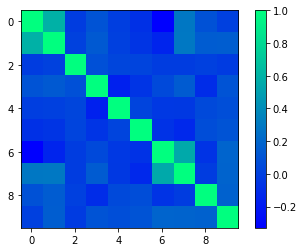

In [40]:
plt.imshow(cclean.corr(),cmap='winter') # try other maps like:  hot, summer,autumn, Blues,magma 
plt.colorbar() # to plot a color bar next to the blot to show the mapping between the colors and the values
plt.savefig('CorrelMx-img.png') # to save the resulted image in a file

##  <font color=#e67e22> 5-Plot the scatter matrix of the data </font>

A single scatterplot supports direct comparison between two attributes by plotting their values along two spatial axes. A scatterplot matrix is the systematic way to compare
all possible pairs of attributes, with the attributes ordered along both
the rows and the columns and one scatterplot at each cell of the matrix

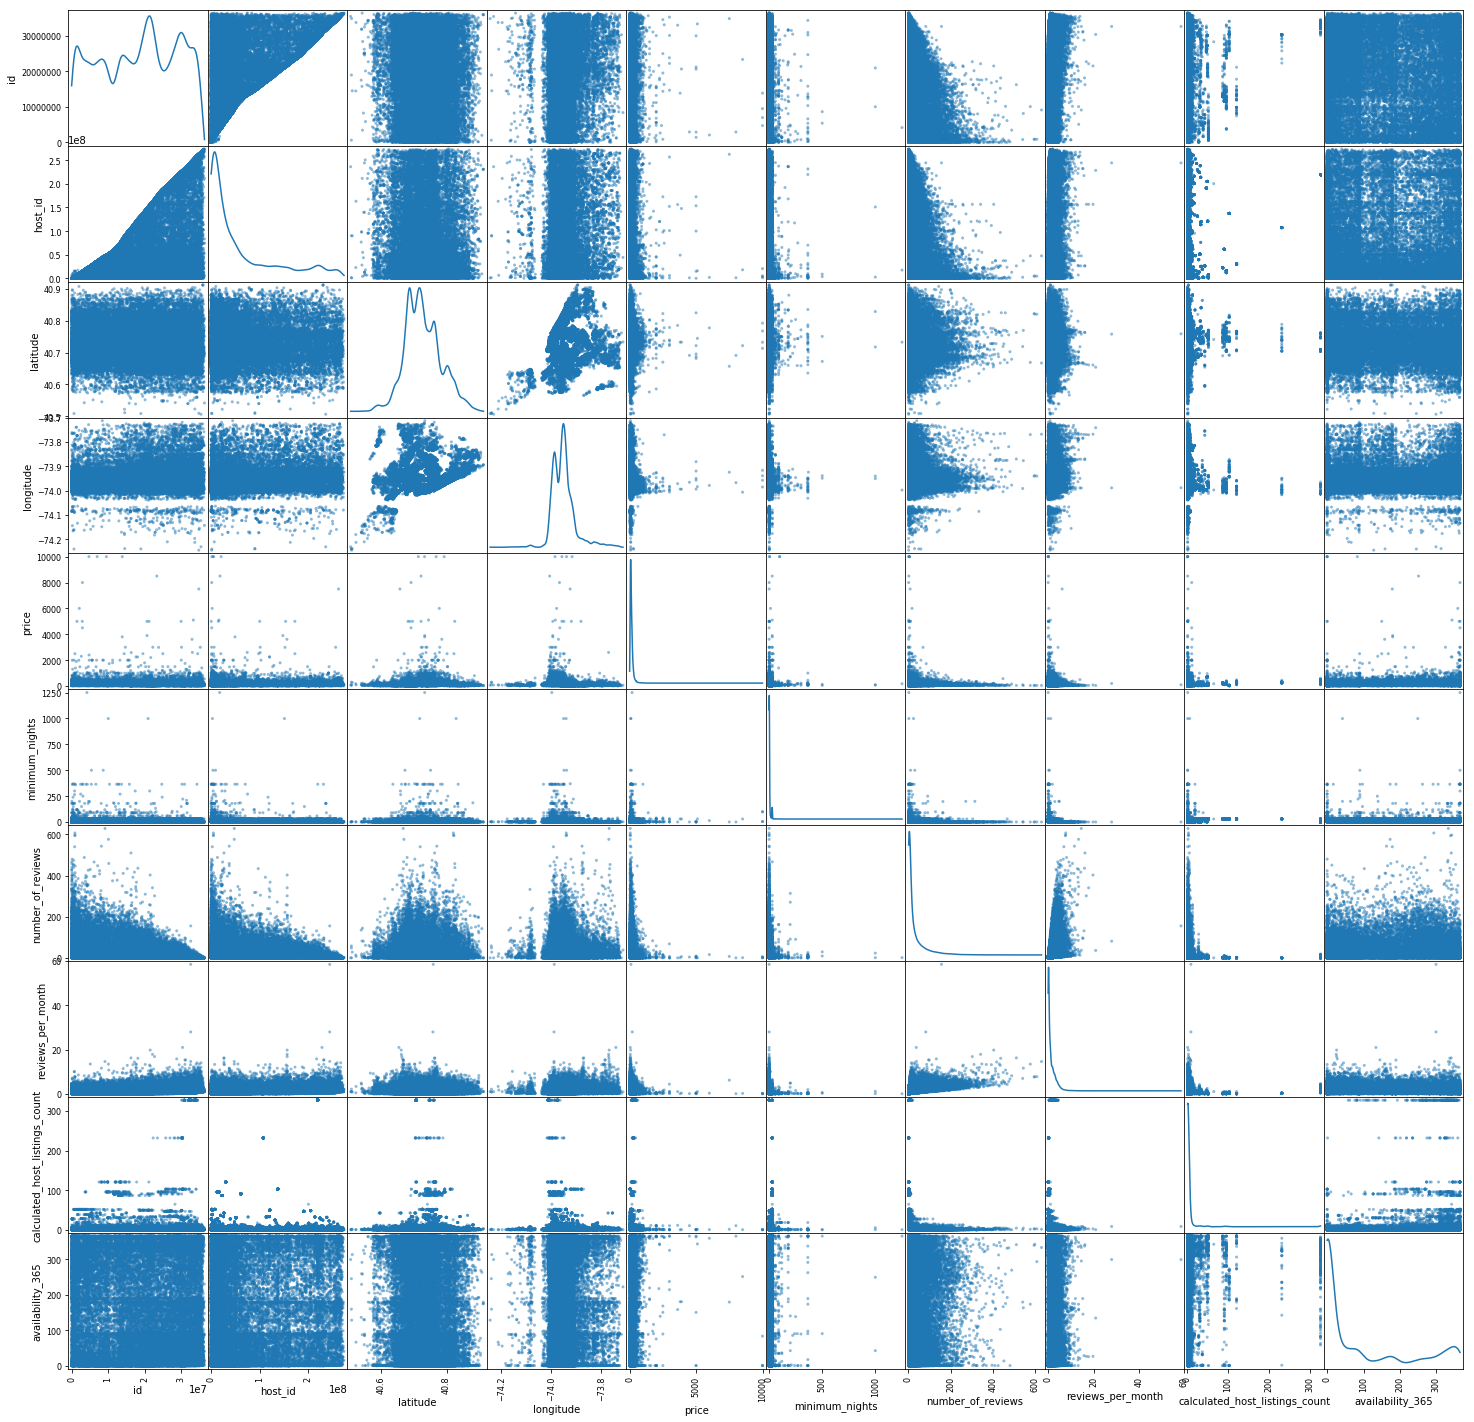

In [41]:
#this takes some time to run, so be patient
sm= pd.plotting.scatter_matrix(cclean, figsize=(25, 25),diagonal='kde')

# we can save the generated figure in a file
plt.savefig('ScaterMx-cln.png')

* diagonal='kde' to have the Kernel Density Estimate of PDF in the diagonal plots
* diagonal='hist' to have a histogram of each variable in the diagonal plots

In [42]:
cols = cclean.columns

In [43]:
cols[:]

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

We can plot the scatter matrix for a selected set of columns

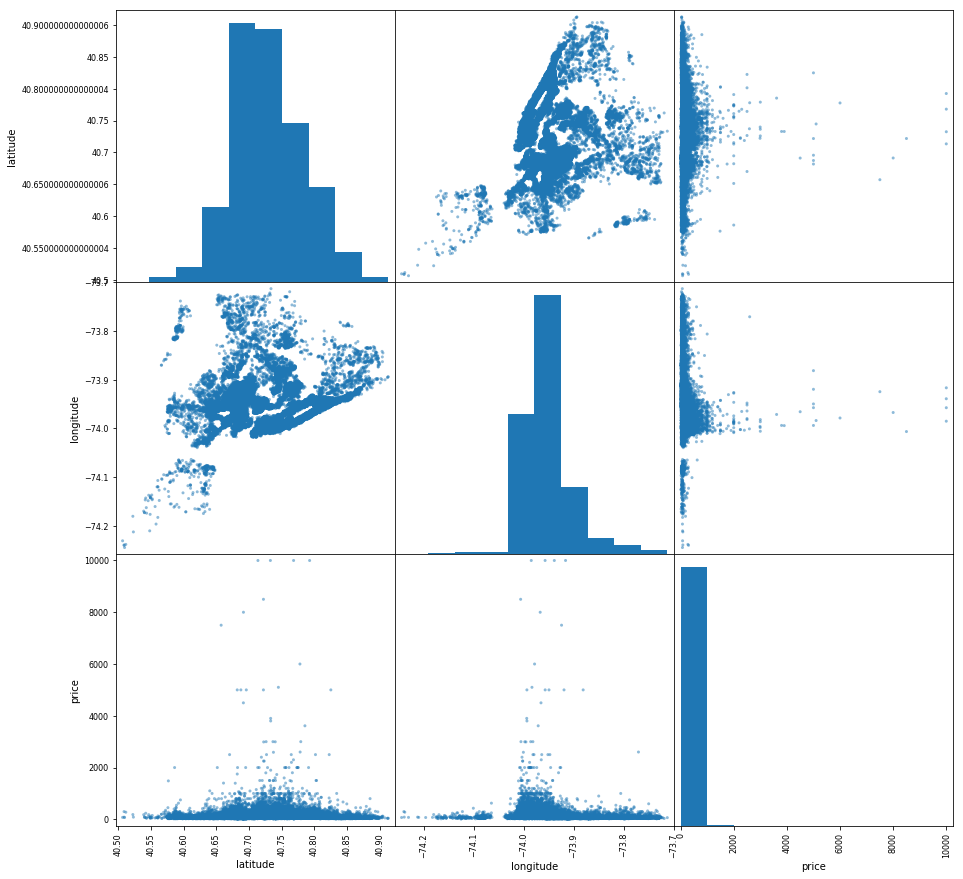

In [44]:
cols = cclean.columns
selected = cols[[6,7,9]]
sm= pd.plotting.scatter_matrix(cclean[selected], figsize=(15, 15),diagonal='hist')
plt.savefig('ScaterMx-3cols.png') # save the scatter matrix in file